# Ocean ONE STEP eddy tracking SATELLITE

In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

In [2]:
# Import SSHa satellite.
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.output/dataset_aviso.nc')
ssha=squeeze(ncfile.variables['sla'][:]*100)
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['longitude'][:]
lat=ncfile.variables['latitude'][:]

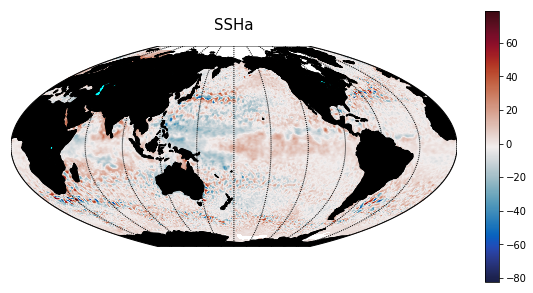

In [3]:
basemap_mplot(lon,lat,ssha[0,:,:],title="SSHa",projection='mbtfpq',lat_0=-90,lon_0=-180,\
              resolution='c',scale='Lin',vmin='',vmax='',cmap=cm.cm.balance,xan=1,yan=1,\
              figsize=(10,5),fontsize=15)
colorbar()

In [4]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
areamap=array([[0,len(lon)],[0,len(lat)]])

In [5]:
eddytd=analyseddyzt(ssha[0,:,:],lon,lat,0,1,1,40,1,1,data_meant='',areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

If you whant to analyze in time the data need to be 3d [i.e. data(t,x,y)]
Be sure the data is an anomaly
 0% [>]100% Time Elapsed: 926 s  

In [6]:
threshold=1
eddysplot=exeddy(eddytd,lat,lon,ssha[0,:,:],0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


In [7]:
eddytdn=analyseddyzt(ssha[0,:,:],lon,lat,0,1,1,-1,-40,1,data_meant='',areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

If you whant to analyze in time the data need to be 3d [i.e. data(t,x,y)]
Be sure the data is an anomaly
 0% [>]100% Time Elapsed: 946 s  

In [8]:
threshold=1
eddysplotn=exeddy(eddytdn,lat,lon,ssha[0,:,:],0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


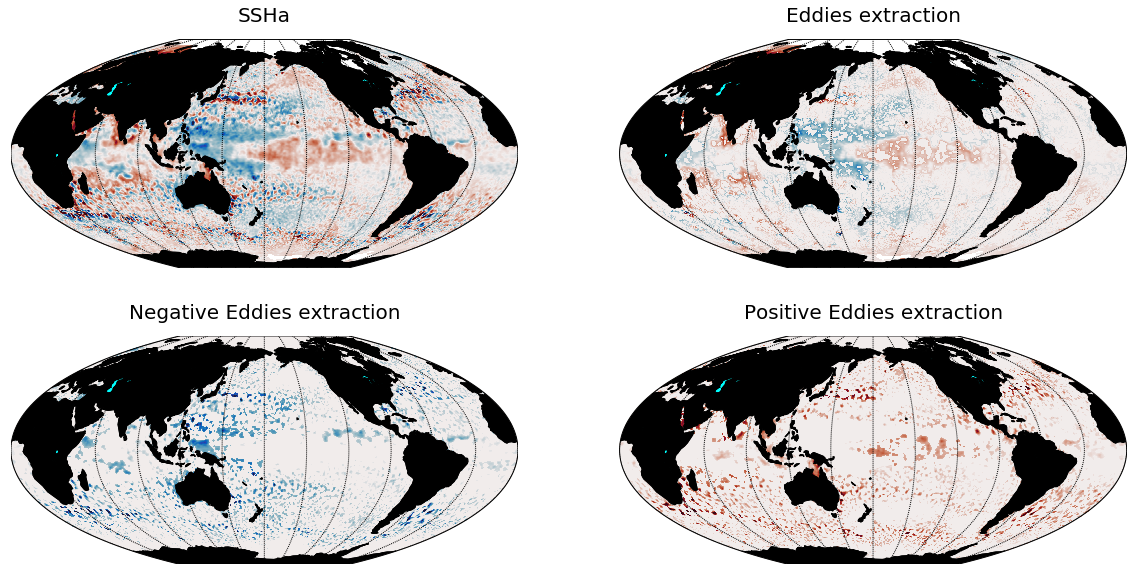

In [9]:
basemap_mplot(lon,lat,[ssha[0,:,:],ssha[0,:,:]-eddysplot-eddysplotn,eddysplotn,eddysplot]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction","Positive Eddies extraction"]\
              ,projection='mbtfpq',lat_0=-90,lon_0=-180,scale='Lin',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,xan=2,yan=2,figsize=(20,10),fontsize=20);